# Real time recognition of human expression using CNN

Importing Libraries

In [44]:
import tensorflow as tf
# pip install tensorflow -> To develop and train ml models

import cv2
# pip install opencv-python -> For image processing and computer vision

import os
# comes by default -> To open a folder

import matplotlib.pyplot as plt
# pip install matplotlib -> To plot graph/chart

import numpy as np
# pip install numpy -> To work on arrays

Displaying an example image in the dataset

In [45]:
# 0 -> Angry
# 1 -> Disgusted
# 2 -> Fearful
# 3 -> Happy
# 4 -> Neutral
# 5 -> Sad
# 6 -> Surprised

In [46]:
img_array = cv2.imread("dataset/train/0/im3.png")

In [47]:
img_array.shape

(48, 48, 3)

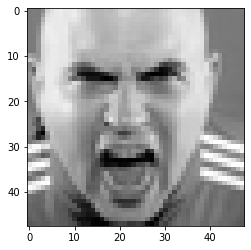

In [48]:
plt.imshow(img_array)

Training the dataset

In [49]:
datadirectory = "dataset/train/"

In [50]:
classes = ["0", "1", "2", "3", "4", "5", "6"]

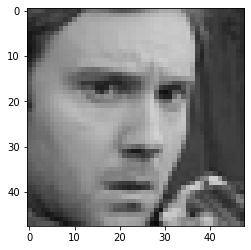

In [51]:
for category in classes:
    path= os.path.join(datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

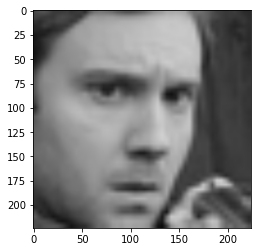

In [52]:
img_size = 224 # Changing the image size to 224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
new_array.shape

(224, 224, 3)

Read all the images and convert them into an array

In [54]:
training_data = [] # data array

def create_training_data():
    for category in classes:
        path = os.path.join(datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                new_arr = cv2.resize(img_arr, (img_size, img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [55]:
create_training_data()

In [56]:
print(len(training_data))

13240


In [57]:
type(training_data)

list

In [58]:
import random
random.shuffle(training_data)

In [59]:
x = []
y = []
for features,label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1, img_size, img_size, 3)  # 4d array

In [60]:
x.shape

(13240, 224, 224, 3)

Normalizing the data

In [61]:
x = x/255.0;  # To avoid data redundancy

In [62]:
y = np.array(y)

In [63]:
y.shape  # 1d array

(13240,)

# Deep Learning model for training - Transfer Learning

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [65]:
model = tf.keras.applications.MobileNetV2()   # Pre-trained model

In [66]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

Transfer Learning

In [67]:
base_input = model.layers[0].input

In [68]:
base_output = model.layers[-2].output

In [69]:
final_output = layers.Dense(128)(base_output)   # adding new layer, after the output of global pooling Layer
final_output = layers.Activation('relu')(final_output)   # activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)   # classification layer

In [70]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_5')>

In [71]:
new_model = keras.Model(inputs = base_input, outputs = base_output)

In [72]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [73]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [74]:
#new_model.fit(x,y,epochs=25)

In [75]:
#new_model.save('model.h5')

In [76]:
new_model = tf.keras.models.load_model('model.h5')

Live image test

In [77]:
frame = cv2.imread("happy_boy.jpg")

In [78]:
frame.shape

(177, 284, 3)

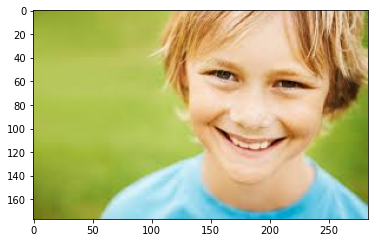

In [80]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Face detection algorithm -> Open Source Computer Vision Library -> Works on gray images

In [82]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [83]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   # converting into gray image

In [84]:
gray.shape

(177, 284)

In [85]:
faces = faceCascade.detectMultiScale (gray, 1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame [y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Blue, Green, Red
    facess = faceCascade.detectMultiScale (roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

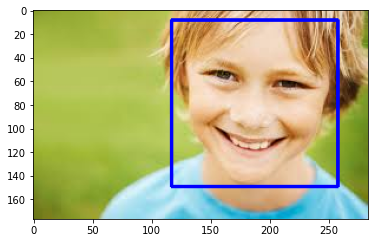

In [86]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

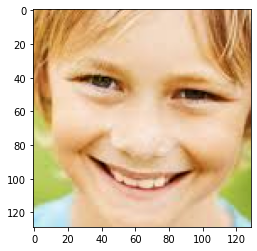

In [87]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))  # cropped image